# Import the Dataset
We will import the dataset `data1.csv` and load it into a pandas DataFrame for analysis.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import numpy as np

# Load the dataset
df = pd.read_csv('data1.csv', sep=';')
df.head()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0


# Data Inspection

Let's perform an initial inspection of the dataset to understand its structure and contents.

## DataFrame Information
Check the data types, non-null counts, and memory usage.

In [3]:
# Display DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   account length                       3333 non-null   int64 
 1   location code                        3333 non-null   int64 
 2   user id                              3333 non-null   int64 
 3   credit card info save                3333 non-null   object
 4   push status                          3333 non-null   object
 5   add to wishlist                      3333 non-null   int64 
 6   desktop sessions                     3333 non-null   int64 
 7   app sessions                         3333 non-null   int64 
 8   desktop transactions                 3333 non-null   int64 
 9   total product detail views           3333 non-null   int64 
 10  session duration                     3333 non-null   int64 
 11  promotion clicks                     3333 n

## Convert European Decimal Separators
Convert all columns with commas as decimal separators to use dots and convert them to float, for accurate numeric analysis.

In [4]:
# Convert all string columns with commas as decimal separators to floats
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = df[col].str.replace(',', '.').astype(float)
        except Exception:
            pass  # If conversion fails, leave the column as is

In [5]:
# Display DataFrame info again to confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   account length                       3333 non-null   int64  
 1   location code                        3333 non-null   int64  
 2   user id                              3333 non-null   int64  
 3   credit card info save                3333 non-null   object 
 4   push status                          3333 non-null   object 
 5   add to wishlist                      3333 non-null   int64  
 6   desktop sessions                     3333 non-null   int64  
 7   app sessions                         3333 non-null   int64  
 8   desktop transactions                 3333 non-null   int64  
 9   total product detail views           3333 non-null   int64  
 10  session duration                     3333 non-null   int64  
 11  promotion clicks              

In [6]:
df.head()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,186.9,121,8.41,10.1,3,2.73,3,0


## Clean Column Names
Replace whitespace in column names with underscores for easier access and consistency.

In [7]:
# Replace whitespace in column names with underscores
df.columns = df.columns.str.replace(' ', '_')
# Display updated column names
df.columns

Index(['account_length', 'location_code', 'user_id', 'credit_card_info_save',
       'push_status', 'add_to_wishlist', 'desktop_sessions', 'app_sessions',
       'desktop_transactions', 'total_product_detail_views',
       'session_duration', 'promotion_clicks', 'avg_order_value',
       'sale_product_views', 'discount_rate_per_visited_products',
       'product_detail_view_per_app_session', 'app_transactions',
       'add_to_cart_per_session', 'customer_service_calls', 'churn'],
      dtype='object')

## Statistical Summary
Get summary statistics for numerical columns.

In [8]:
# Display summary statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,3333.0,1.010648e+02,39.822106,1.00,74.00,101.00,127.00,243.00
location_code,3333.0,4.371824e+02,42.371290,408.00,408.00,415.00,510.00,510.00
user_id,3333.0,3.746291e+06,274662.573752,3271058.00,3508680.00,3748187.00,3985970.00,4229964.00
add_to_wishlist,3333.0,8.099010e+00,13.688365,0.00,0.00,0.00,20.00,51.00
desktop_sessions,3333.0,1.798119e+02,54.457135,0.00,144.00,179.00,216.00,351.00
app_sessions,3333.0,3.056796e+01,9.269376,0.00,24.00,31.00,37.00,60.00
desktop_transactions,3333.0,1.708761e+01,4.323795,0.00,14.00,17.00,20.00,31.00
total_product_detail_views,3333.0,1.004356e+02,20.069084,0.00,87.00,101.00,114.00,165.00
session_duration,3333.0,2.010396e+02,50.714359,0.00,167.00,201.00,235.00,364.00
promotion_clicks,3333.0,1.001107e+02,19.923911,0.00,87.00,100.00,114.00,170.00


## Check for Missing Values
Identify columns with missing data.

In [9]:
# Check for missing values in each column
df.isnull().sum()

account_length                         0
location_code                          0
user_id                                0
credit_card_info_save                  0
push_status                            0
add_to_wishlist                        0
desktop_sessions                       0
app_sessions                           0
desktop_transactions                   0
total_product_detail_views             0
session_duration                       0
promotion_clicks                       0
avg_order_value                        0
sale_product_views                     0
discount_rate_per_visited_products     0
product_detail_view_per_app_session    0
app_transactions                       0
add_to_cart_per_session                0
customer_service_calls                 0
churn                                  0
dtype: int64

## Target Variable Balance: Churn
Examine the distribution of the target column `churn` to understand class balance.

In [10]:
# Display the value counts for the target column 'churn'
df['churn'].value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

In [11]:
# Display the percentage distribution for the target column 'churn'
df['churn'].value_counts(normalize=True) * 100

churn
0    85.508551
1    14.491449
Name: proportion, dtype: float64

## Visualize Churn Distribution
Visualize the distribution of the target column `churn` to better understand class balance.

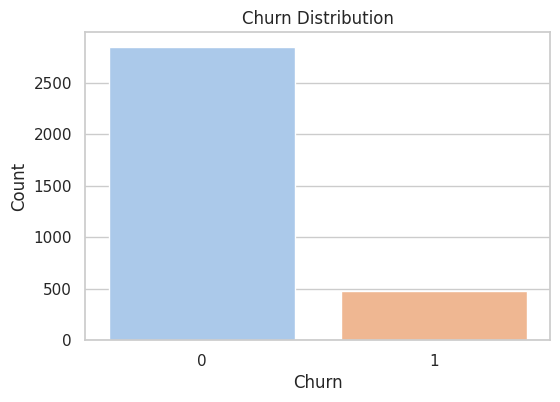

In [12]:
# Set style for better visuals
sns.set(style="whitegrid")

# Plot churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df, palette='pastel',hue='churn',legend=False)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

## Feature Distributions by Churn
Visualize the distribution of each numeric feature in relation to the target variable `churn` to identify potential patterns or differences.

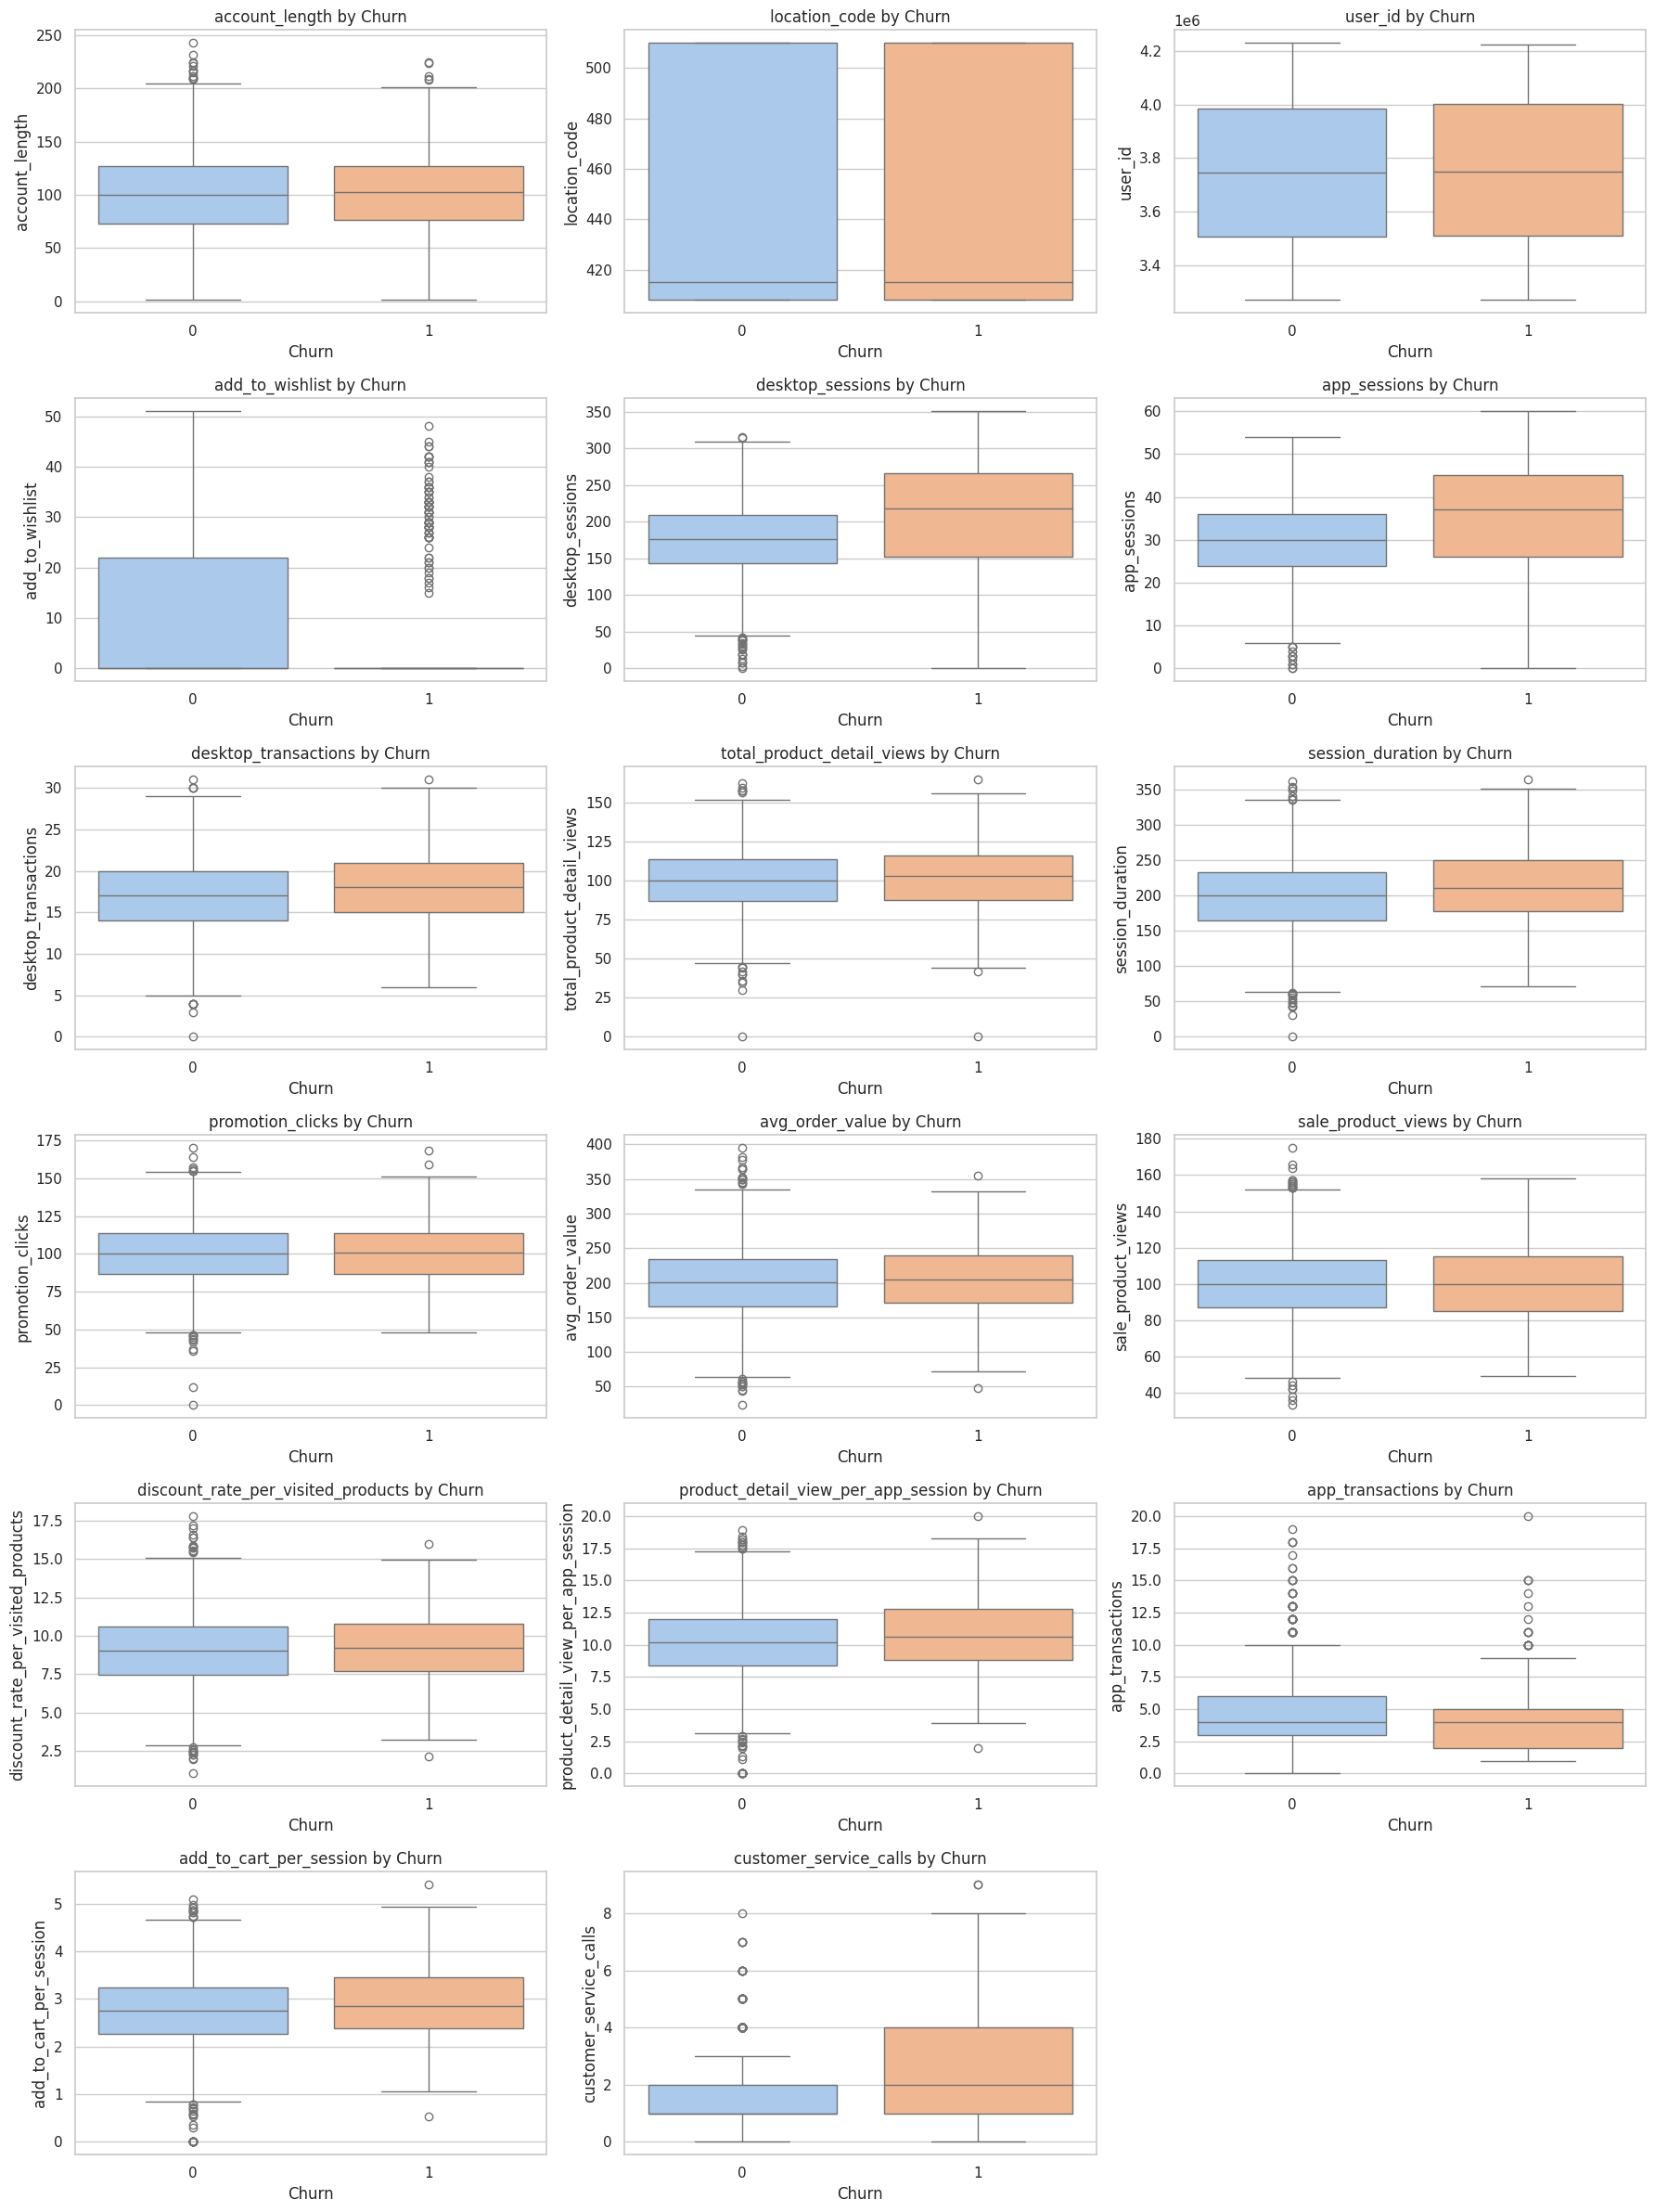

In [13]:
# Select only numeric columns for visualization
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('churn', errors='ignore')

# Set up the plotting grid
n_cols = 3
n_rows = int((len(numeric_cols) + n_cols - 1) / n_cols)
plt.figure(figsize=(6 * n_cols, 4 * n_rows))

for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.boxplot(x='churn', y=col, data=df, palette='pastel', hue='churn',legend=False)
    plt.title(f'{col} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## One-Hot Encode Categorical Columns
Transform categorical columns into dummy/indicator variables using one-hot encoding for machine learning compatibility.

In [14]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,account_length,location_code,user_id,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn,credit_card_info_save_yes,push_status_yes
0,128,415,3824657,25,265,45,17,110,197,87,244.7,91,11.01,10.0,3,2.70,1,0,False,True
1,107,415,3717191,26,162,27,17,123,196,103,254.4,103,11.45,13.7,3,3.70,1,0,False,True
2,137,415,3581921,0,243,41,10,114,121,110,162.6,104,7.32,12.2,5,3.29,0,0,False,False
3,84,408,3759999,0,299,51,5,71,62,88,196.9,89,8.86,6.6,7,1.78,2,0,True,False
4,75,415,3306626,0,167,28,13,113,148,122,186.9,121,8.41,10.1,3,2.73,3,0,True,False


## Correlation Matrix
Compute and display the correlation matrix for all numerical features in the encoded DataFrame to identify relationships between variables.

In [15]:
# Compute the correlation matrix for the encoded DataFrame
corr_matrix = df_encoded.corr()
corr_matrix

,account_length,location_code,user_id,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn,credit_card_info_save_yes,push_status_yes
account_length,1.000000,-0.012463,0.004808,-0.004628,0.006191,0.007158,-0.007882,0.038470,-0.006790,0.019136,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541,0.024735,0.002918
location_code,-0.012463,1.000000,-0.014029,-0.001994,-0.008390,-0.007940,0.003712,-0.009646,0.003894,-0.011791,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174,0.048551,-0.000747
user_id,0.004808,-0.014029,1.000000,0.022569,0.012035,0.011246,-0.017838,-0.005812,-0.017708,0.003468,-0.008047,0.014034,-0.008049,-0.010269,-0.017676,-0.010245,0.033847,0.005730,0.019941,0.030755
add_to_wishlist,-0.004628,-0.001994,0.022569,1.000000,0.001005,0.000030,0.019325,-0.009548,0.017443,-0.006087,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728,0.008745,0.956927
desktop_sessions,0.006191,-0.008390,0.012035,0.001005,1.000000,0.999498,0.006033,0.006561,0.007216,0.015495,0.004389,0.023060,0.004366,-0.010142,0.008148,-0.010079,-0.013432,0.205138,0.049411,-0.001423
app_sessions,0.007158,-0.007940,0.011246,0.000030,0.999498,1.000000,0.005752,0.006363,0.006943,0.015923,0.004068,0.022918,0.004045,-0.010222,0.008017,-0.010157,-0.012835,0.204683,0.050507,-0.002508
desktop_transactions,-0.007882,0.003712,-0.017838,0.019325,0.006033,0.005752,1.000000,-0.019646,0.997815,-0.009742,-0.010900,0.007323,-0.010911,-0.013194,0.000874,-0.013226,-0.014265,0.091811,0.022451,0.023307
total_product_detail_views,0.038470,-0.009646,-0.005812,-0.009548,0.006561,0.006363,-0.019646,1.000000,-0.021409,0.006376,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459,0.003755,-0.011086
session_duration,-0.006790,0.003894,-0.017708,0.017443,0.007216,0.006943,0.997815,-0.021409,1.000000,-0.011477,-0.012476,0.007613,-0.012485,-0.011033,0.002697,-0.011065,-0.012971,0.092783,0.019305,0.021501
promotion_clicks,0.019136,-0.011791,0.003468,-0.006087,0.015495,0.015923,-0.009742,0.006376,-0.011477,1.000000,-0.002249,0.007793,-0.002212,0.008718,0.017541,0.008689,0.002500,0.009307,0.006172,-0.006736


## Correlation Matrix Heatmap
Visualize the correlation matrix using a heatmap to easily identify strong and weak relationships between features.

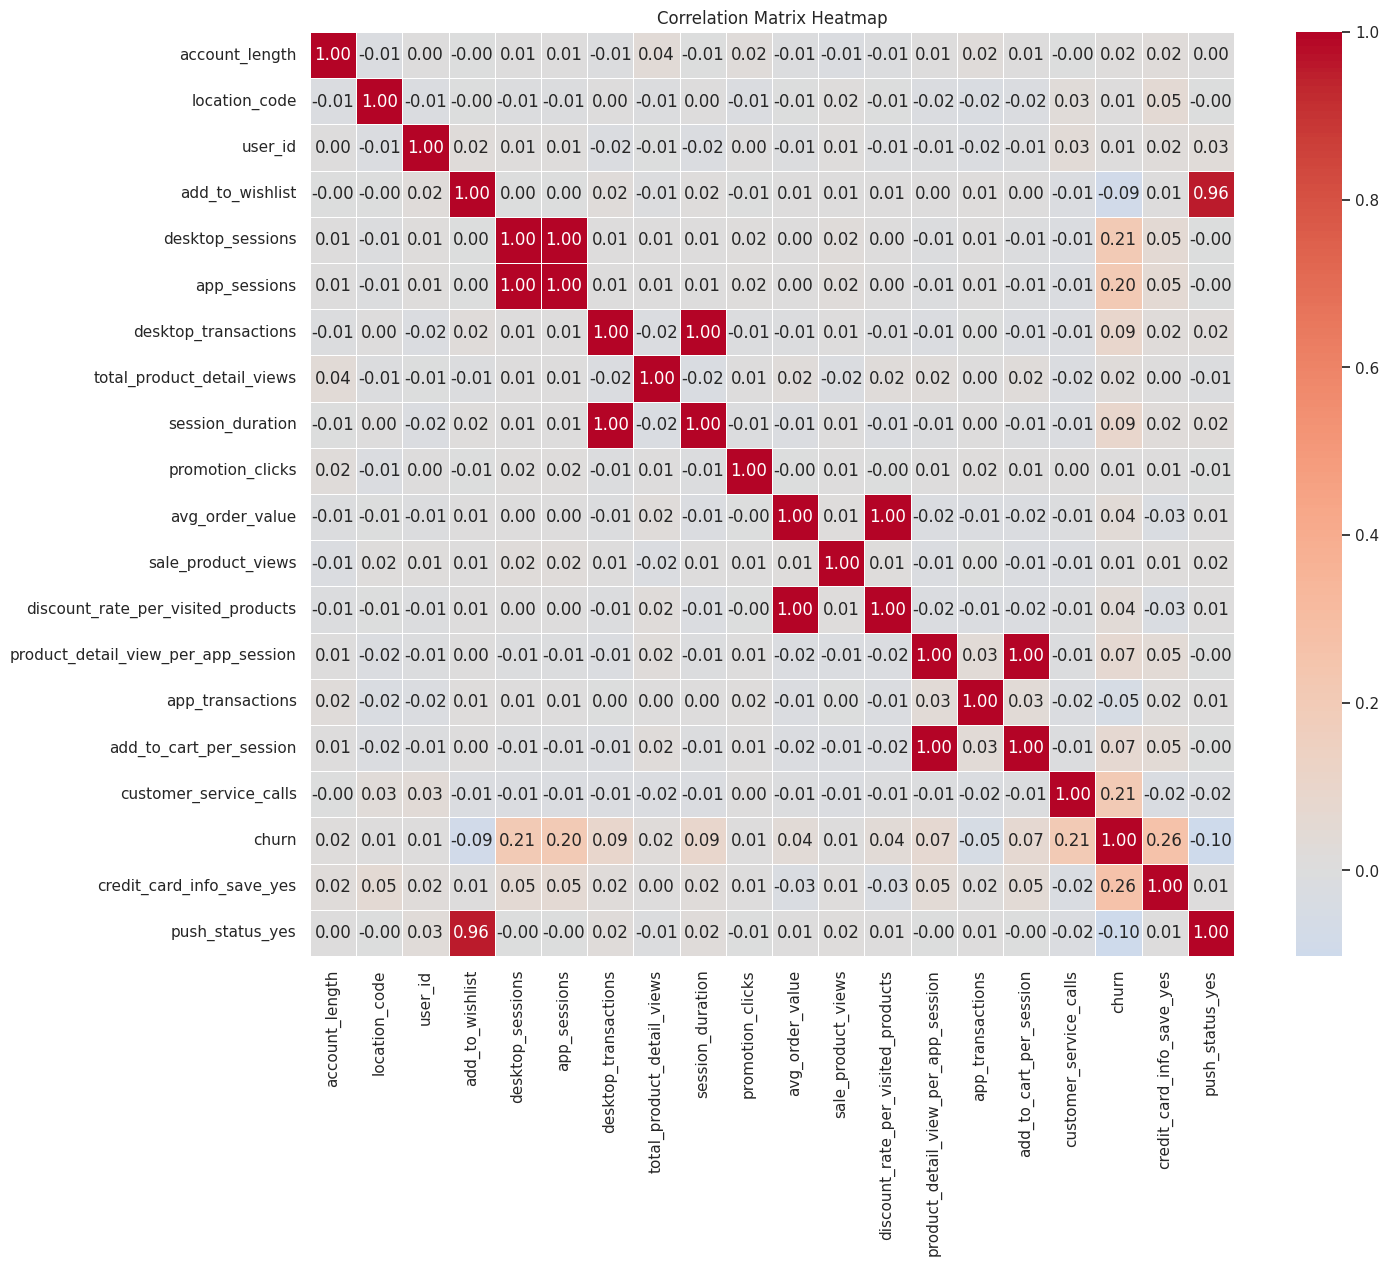

In [16]:
# Set up the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [17]:
# Remove multicollinearity
# Identify columns with high correlation (e.g., > 0.95)
corr_matrix = df_encoded.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print("Columns to drop due to high correlation:", to_drop)

# Drop highly correlated columns
df_encoded = df_encoded.drop(columns=to_drop)

Columns to drop due to high correlation: ['app_sessions', 'session_duration', 'discount_rate_per_visited_products', 'add_to_cart_per_session', 'push_status_yes']


## Save a Manual Demo Set

The code above correctly splits the last 300 rows from `df_encoded` into `df_manual` for manual testing or demonstration, and updates `df_encoded` to exclude these rows. This avoids potential issues with chained indexing and ensures both DataFrames are independent copies.

In [18]:
# --- Save a Manual Demo Set ---
# Split off the last 300 rows as a manual demo set, and keep the rest for modeling.
df_manual = df_encoded.tail(300).copy()
df_encoded = df_encoded.iloc[:-300].copy()

## Train-Test Split and Resampling
Split the data into training and testing sets. Then, resample the majority class in the `churn` column only on the training set to address class imbalance, ensuring no data leakage into the test set.

In [19]:
# Separate features and target
X = df_encoded.drop(['churn','user_id'], axis=1)
y = df_encoded['churn']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Combine X_train and y_train for resampling
train_data = X_train.copy()
train_data['churn'] = y_train

# Separate majority and minority classes
majority = train_data[train_data['churn'] == train_data['churn'].value_counts().idxmax()]
minority = train_data[train_data['churn'] != train_data['churn'].value_counts().idxmax()]

# Downsample majority class
majority_downsampled = resample(
    majority,
    replace=False,
    n_samples=len(minority),
    random_state=42
)

# Combine minority class with downsampled majority class
train_resampled = pd.concat([majority_downsampled, minority])

# Shuffle the resampled training set
train_resampled = train_resampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and target after resampling
X_train_resampled = train_resampled.drop('churn', axis=1)
y_train_resampled = train_resampled['churn']

# Show class distribution after resampling
y_train_resampled.value_counts()

churn
1    351
0    351
Name: count, dtype: int64

## Feature Scaling with StandardScaler
Scale the features using StandardScaler to improve model convergence and performance. The scaler is fit on the resampled training set and applied to both train and test sets.

In [20]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

## Baseline Logistic Regression Model (with Scaled Data)
Train and evaluate a baseline logistic regression model using the scaled, resampled training set and the scaled test set.

In [21]:
# Train logistic regression on scaled, resampled training data
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_resampled_scaled, y_train_resampled)

# Predict on scaled test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7578253706754531

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.76      0.84       519
           1       0.34      0.74      0.47        88

    accuracy                           0.76       607
   macro avg       0.64      0.75      0.66       607
weighted avg       0.86      0.76      0.79       607


Confusion Matrix:
 [[395 124]
 [ 23  65]]


## Model Comparison with Grid Search and ROC Curves (with Scaled Data)
Train and compare six different classification models using grid search for hyperparameter tuning. Visualize their ROC curves on the same chart for evaluation, using the scaled data.

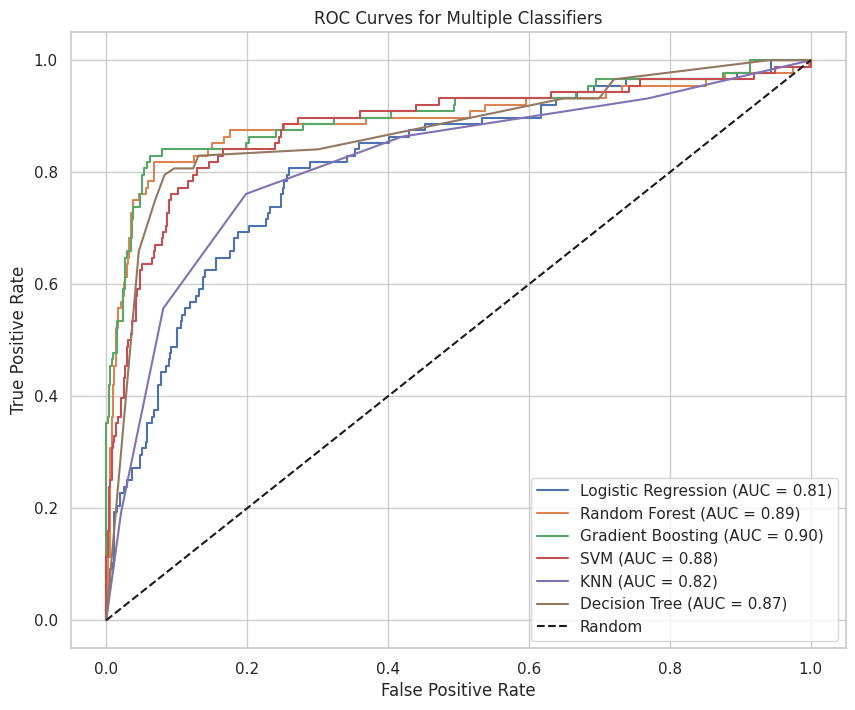

In [22]:
# Define models and their parameter grids
models = {
    "Logistic Regression": (LogisticRegression(max_iter=1000, random_state=42), {
        "C": [0.01, 0.1, 1, 10]
    }),
    "Random Forest": (RandomForestClassifier(random_state=42), {
        "n_estimators": [50, 100],
        "max_depth": [None, 5, 10]
    }),
    "Gradient Boosting": (GradientBoostingClassifier(random_state=42), {
        "n_estimators": [50, 100],
        "learning_rate": [0.01, 0.1, 0.2]
    }),
    "SVM": (SVC(probability=True, random_state=42), {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    }),
    "KNN": (KNeighborsClassifier(), {
        "n_neighbors": [3, 5, 7]
    }),
    "Decision Tree": (DecisionTreeClassifier(random_state=42), {
        "max_depth": [None, 5, 10]
    })
}

results = {}
plt.figure(figsize=(10, 8))

for name, (model, params) in models.items():
    grid = GridSearchCV(model, params, cv=3, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train_resampled_scaled, y_train_resampled)
    best_model = grid.best_estimator_
    y_proba = best_model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    results[name] = {
        "model": best_model,
        "roc_auc": roc_auc,
        "fpr": fpr,
        "tpr": tpr
    }
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Classifiers')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Model Interpretation with LIME
Use LIME to interpret the predictions of the best model on the test set.

In [23]:
# LIME Interpretation
import lime
import lime.lime_tabular

# Use the same feature names as the model
feature_names = X_test.columns
class_names = ['No Churn', 'Churn']

explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=feature_names,
    class_names=class_names,
    discretize_continuous=True,
    mode='classification'
)

# Explain a single prediction
idx = 0  # You can change this index to explain other samples
y_test_array = y_test.values if hasattr(y_test, 'values') else y_test
exp = explainer.explain_instance(X_test.values[idx], best_model.predict_proba, num_features=10)
exp.show_in_notebook(show_table=True)

## Export the Gradient Boosting Model and StandardScaler with Pickle

Save both the best Gradient Boosting model and the fitted StandardScaler to files for later use or deployment.

In [25]:
import pickle

# Save the best Gradient Boosting model found during grid search
gb_model = results["Gradient Boosting"]["model"]
with open("gradient_boosting_model.pkl", "wb") as f:
    pickle.dump(gb_model, f)

# Save the fitted StandardScaler
with open("standard_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Gradient Boosting model exported as gradient_boosting_model.pkl")
print("StandardScaler exported as standard_scaler.pkl")

Gradient Boosting model exported as gradient_boosting_model.pkl
StandardScaler exported as standard_scaler.pkl


## Export the Manual Hold-Out Demo Data Set

Save the manual demo set (last 300 rows) to a CSV file for later use or demonstration.

In [26]:
# Export the manual hold-out demo data set to CSV
# This will save the last 300 rows (df_manual) to a file

df_manual.to_csv("manual_demo_set.csv", index=False)
print("Manual demo set exported as manual_demo_set.csv")

Manual demo set exported as manual_demo_set.csv


## Load and Test the Manual Hold-Out Demo Set

Load the exported manual demo set and evaluate the saved Gradient Boosting model on this data. This cell assumes the target column is present and named 'churn'.

Accuracy on manual hold-out set: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92       256
           1       0.53      0.95      0.68        44

    accuracy                           0.87       300
   macro avg       0.76      0.91      0.80       300
weighted avg       0.92      0.87      0.88       300


Confusion Matrix:
 [[219  37]
 [  2  42]]


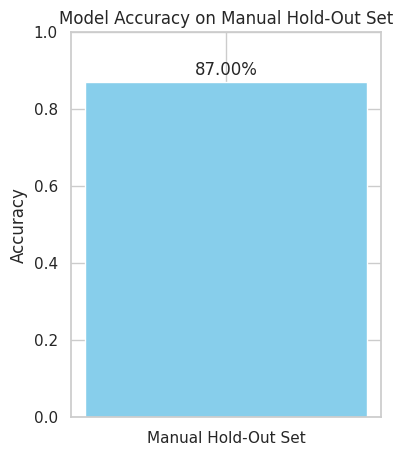

In [ ]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the manual demo set
manual_demo = pd.read_csv("manual_demo_set.csv")

# Load the saved StandardScaler and Gradient Boosting model
with open("standard_scaler.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)
with open("gradient_boosting_model.pkl", "rb") as f:
    loaded_gb_model = pickle.load(f)

# Prepare features and target (adjust column names as needed)
X_manual = manual_demo.drop(["churn", "user_id"], axis=1)
y_manual = manual_demo["churn"]

# Scale features
X_manual_scaled = loaded_scaler.transform(X_manual)

# Predict and evaluate
manual_pred = loaded_gb_model.predict(X_manual_scaled)


print("Accuracy on manual hold-out set:", accuracy_score(y_manual, manual_pred))
print("\nClassification Report:\n", classification_report(y_manual, manual_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_manual, manual_pred))



# Calculate accuracy
accuracy = accuracy_score(y_manual, manual_pred)

# Plot accuracy as a bar
plt.figure(figsize=(4, 5))
plt.bar(['Manual Hold-Out Set'], [accuracy], color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy on Manual Hold-Out Set')
plt.text(0, accuracy + 0.02, f"{accuracy:.2%}", ha='center', fontsize=12)
plt.show()